![NYC Skyline](nyc.jpg)

Welcome to New York City, one of the most-visited cities in the world. There are many Airbnb listings in New York City to meet the high demand for temporary lodging for travelers, which can be anywhere between a few nights to many months. In this project, we will take a closer look at the New York Airbnb market by combining data from multiple file types like `.csv`, `.tsv`, and `.xlsx`.

Recall that **CSV**, **TSV**, and **Excel** files are three common formats for storing data. 
Three files containing data on 2019 Airbnb listings are available to you:

**data/airbnb_price.csv**
This is a CSV file containing data on Airbnb listing prices and locations.
- **`listing_id`**: unique identifier of listing
- **`price`**: nightly listing price in USD
- **`nbhood_full`**: name of borough and neighborhood where listing is located

**data/airbnb_room_type.xlsx**
This is an Excel file containing data on Airbnb listing descriptions and room types.
- **`listing_id`**: unique identifier of listing
- **`description`**: listing description
- **`room_type`**: Airbnb has three types of rooms: shared rooms, private rooms, and entire homes/apartments

**data/airbnb_last_review.tsv**
This is a TSV file containing data on Airbnb host names and review dates.
- **`listing_id`**: unique identifier of listing
- **`host_name`**: name of listing host
- **`last_review`**: date when the listing was last reviewed

# Project instruction and objectives:
As a consultant working for a real estate start-up, you have collected Airbnb listing data from various sources to investigate the short-term rental market in New York. You'll analyze this data to provide insights on private rooms to the real estate company.

There are three files in the data folder: airbnb_price.csv, airbnb_room_type.xlsx, airbnb_last_review.tsv.

**1) What are the dates of the earliest and most recent reviews? Store these values as two separate variables with your preferred names.
2) How many of the listings are private rooms? Save this into any variable.
3) What is the average listing price? Round to the nearest penny and save into a variable.
4) Combine the new variables into one DataFrame called review_dates with four columns in the following order: first_reviewed, last_reviewed, nb_private_rooms, and avg_price. The DataFrame should only contain one row of values.**

# Importing libraries and loading data

In [134]:
# We've loaded your first package for you! You can add as many cells as you need.
import numpy as np
from datetime import datetime as dt
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

# Reading data using pandas into DataFrames
airbnb_price = pd.read_csv('data/airbnb_price.csv')
airbnb_room_type = pd.read_excel('data/airbnb_room_type.xlsx',sheet_name=0)
airbnb_last_review = pd.read_table('data/airbnb_last_review.tsv')
print(airbnb_price.head(10),'\n',airbnb_room_type.head(10),'\n',airbnb_last_review.head(10))

# Joining data together
airbnb_joined = airbnb_price.set_index('listing_id').join([airbnb_room_type.set_index('listing_id'), airbnb_last_review.set_index('listing_id')])

# valdiating that there aren't duplicates
assert not airbnb_joined.index.duplicated().any()
print('AFTER JOINING','\n',airbnb_joined.head(5))

   listing_id        price                 nbhood_full
0        2595  225 dollars          Manhattan, Midtown
1        3831   89 dollars      Brooklyn, Clinton Hill
2        5099  200 dollars      Manhattan, Murray Hill
3        5178   79 dollars   Manhattan, Hell's Kitchen
4        5238  150 dollars        Manhattan, Chinatown
5        5295  135 dollars  Manhattan, Upper West Side
6        5441   85 dollars   Manhattan, Hell's Kitchen
7        5803   89 dollars       Brooklyn, South Slope
8        6021   85 dollars  Manhattan, Upper West Side
9        6848  140 dollars      Brooklyn, Williamsburg 
    listing_id  ...        room_type
0        2595  ...  Entire home/apt
1        3831  ...  Entire home/apt
2        5099  ...  Entire home/apt
3        5178  ...     private room
4        5238  ...  Entire home/apt
5        5295  ...  Entire home/apt
6        5441  ...     Private room
7        5803  ...     Private room
8        6021  ...     Private room
9        6848  ...  entire home/a

# Visualizing missing **data**

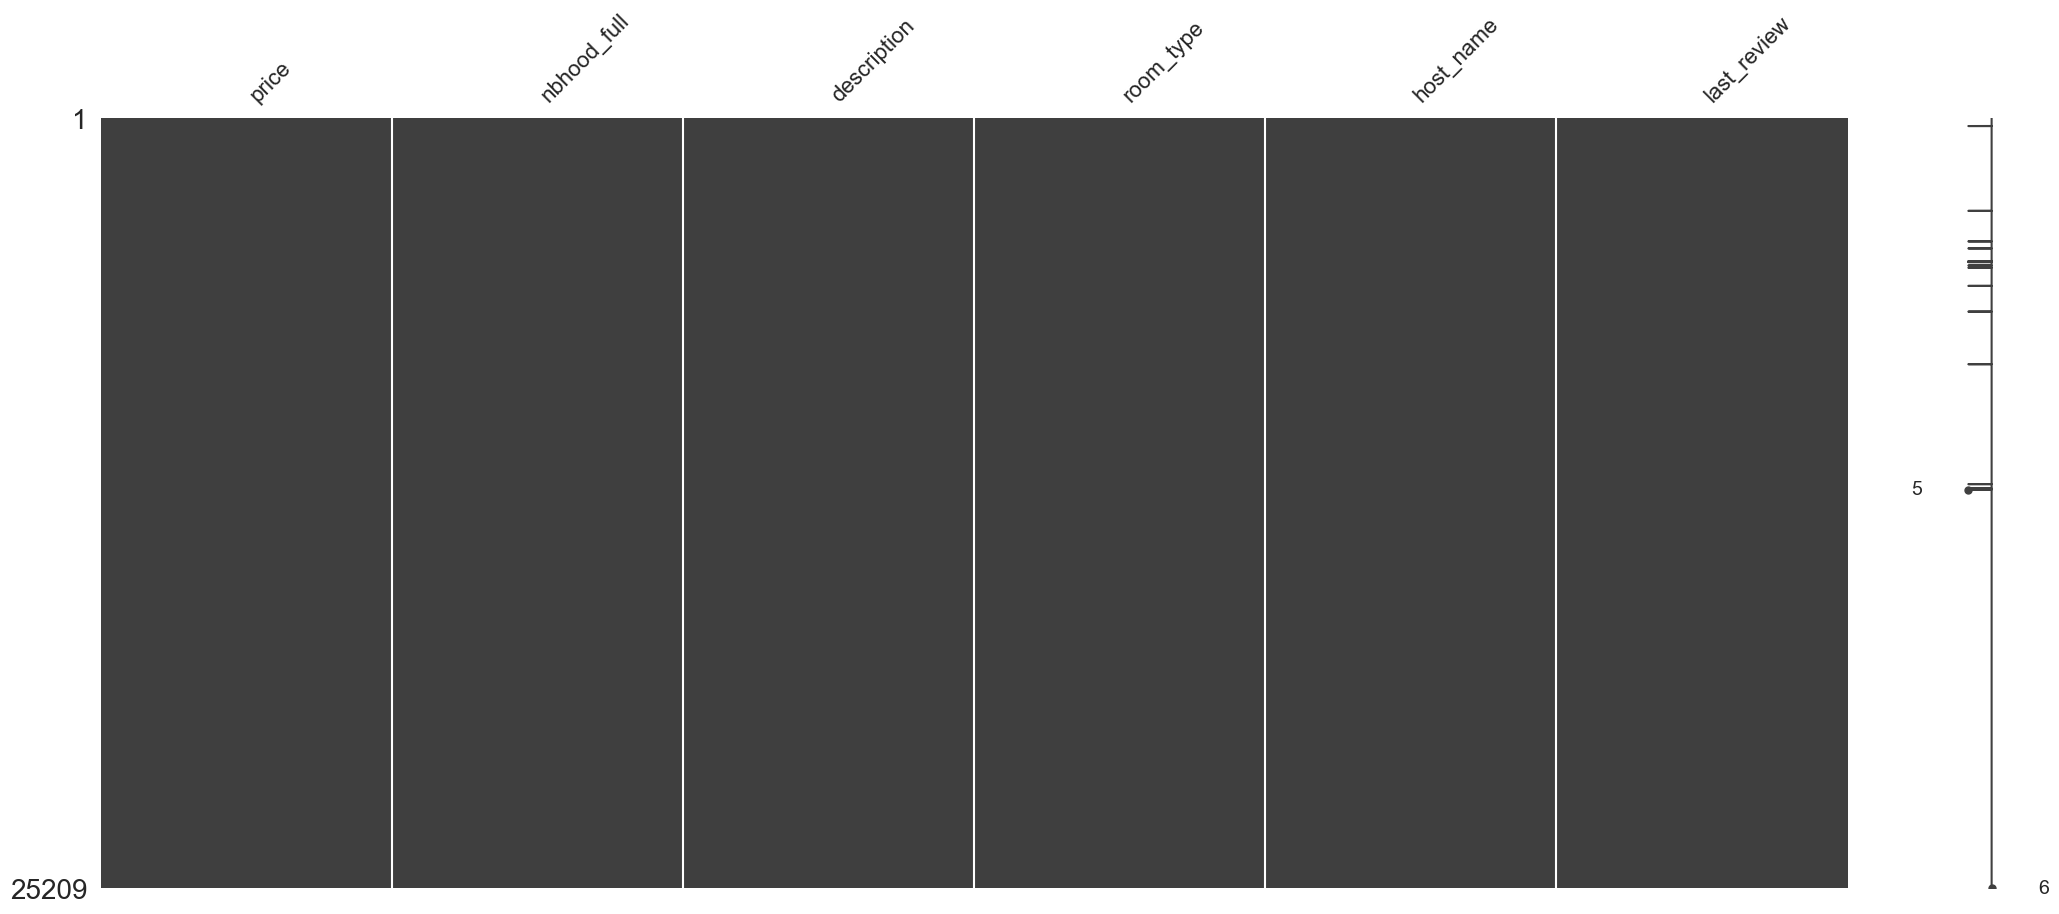

In [135]:
# Visualizing any missing data using missingno
msno.matrix(airbnb_joined)
plt.show()

# Modifying data types to its proper type

In [136]:
print(airbnb_joined.info())
airbnb_joined['price'] = airbnb_joined['price'].str.strip('dollars').astype('int')
airbnb_joined['room_type'] = airbnb_joined['room_type'].str.lower().astype('category')
#modifiying date to datetime format
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July',
          'August', 'September', 'October', 'November', 'December']
for date in airbnb_joined['last_review']:
    for i in range(len(months)):
     if date[0:2] == months[i][0:2]:
        date = date.split(' ')
        date[0] = months[i]
        date = ' '.join(date)
airbnb_joined['last_review'] = pd.to_datetime(airbnb_joined['last_review'], format='%B %d %Y', utc=False)
print(airbnb_joined['last_review'].unique())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25209 entries, 2595 to 36455809
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   price        25209 non-null  object
 1   nbhood_full  25209 non-null  object
 2   description  25199 non-null  object
 3   room_type    25209 non-null  object
 4   host_name    25201 non-null  object
 5   last_review  25209 non-null  object
dtypes: object(6)
memory usage: 1.9+ MB
None
['2019-05-21T00:00:00.000000000' '2019-07-05T00:00:00.000000000'
 '2019-06-22T00:00:00.000000000' '2019-06-24T00:00:00.000000000'
 '2019-06-09T00:00:00.000000000' '2019-06-23T00:00:00.000000000'
 '2019-06-29T00:00:00.000000000' '2019-06-28T00:00:00.000000000'
 '2019-07-01T00:00:00.000000000' '2019-01-01T00:00:00.000000000'
 '2019-07-02T00:00:00.000000000' '2019-06-19T00:00:00.000000000'
 '2019-06-15T00:00:00.000000000' '2019-04-19T00:00:00.000000000'
 '2019-06-01T00:00:00.000000000' '2019-06-14T00:00:00.0000

## 1.0: Answering -> What are the dates of the earliest and most recent reviews?

In [137]:
airbnb_joined_sorted = airbnb_joined.sort_values(by='last_review',ascending=True)
first_date = airbnb_joined_sorted['last_review'].iloc[0]
last_date  = airbnb_joined_sorted['last_review'].iloc[-1]
print('First date =',first_date,'\n','last date =',last_date)

First date = 2019-01-01 00:00:00 
 last date = 2019-07-09 00:00:00


## 2.0: Answering -> How many of the listings are private rooms? Save this into any variable.

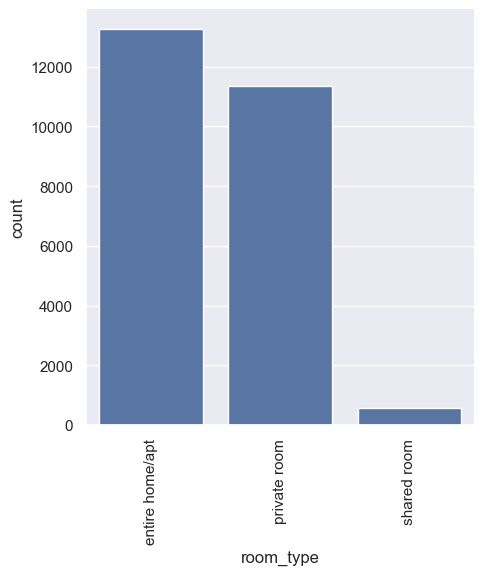

this many 11356


In [138]:
sns.catplot(data=airbnb_joined,x='room_type',kind='count')
sns.set(rc={'figure.figsize': (16,9)})
plt.xticks(rotation=90)
plt.show()
private_room_count = len(airbnb_joined[airbnb_joined['room_type'] == 'private room'])
print('this many',private_room_count)

## 3.0: Answering -> What is the average listing price? Round to the nearest penny and save into a variable.

In [139]:
#pricing based on type
airbnb_joined_grouped = airbnb_joined.groupby('room_type')['price'].agg('mean')
# averge of all
airbnb_joined_average = airbnb_joined['price'].mean().round(2)
print('average price of all = ',airbnb_joined_average)

average price of all =  141.78


## 4.0 combining all of our insights into a dataframe

In [140]:
review_dates = pd.DataFrame({'first_reviewed': [first_date],
                             'last_reviewed': [last_date],
                             'nb_private_rooms': [private_room_count],
                             'avg_price': [airbnb_joined_average]})
print(review_dates)

  first_reviewed last_reviewed  nb_private_rooms  avg_price
0     2019-01-01    2019-07-09             11356     141.78
